# 4. 신경망 학습

* 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것입니다.

## 4.1 데이터에서 학습한다!

* 신경망의 특징은 데이터를 보고 학습할 수 있습니다. (가중치 매개변수의 값을 데이터로 보고 자동으로 결정)

### 4.1.1 데이터 주도 학습

* 기계학습은 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만듭니다. 
* 이미지를 인식하는 알고리즘을 만드려면, 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있습니다. 

### 4.1.2 훈련 데이터와 시험 데이터

* 기계학습 문제는 범용 능력을 제대로 평가하기 위해 데이터를 훈련 데이터와 시험 데이터로 나눠 학습과 실험을 수행합니다. 
* 범용 능력은 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력입니다. 
* 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾고, 시험 데이터를 사용하여 훈련한 모델의 실력을 평가합니다. 
* 한 데이터셋에 지나치게 최적화하면 오버피팅이 될 수도 있습니다. 

## 4.2 손실 함수

* 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색합니다. 
* 신경망 학습에서 사용하는 지표는 손실 함수라고 합니다. 
* 손실 함수는 임의의 함수를 사용할 수도 있지만, 오차제곱합과 교차 엔트로피 오차를 사용합니다. 

### 4.2.1 오차제곱합

* 가장 많이 쓰이는 손실 함수는 오차제곱합입니다. 

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

* 원-핫 인코딩: 한 원소만 1로 하고, 그 외는 0으로 나타내는 표기법

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
import numpy as np 

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### 4.2.2 교차 엔트로피 오차

* 또 다른 손실 함수로서 교차 엔트로피 오차도 자주 이용합니다.

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

* 오차제곱합의 판단과 일치합니다. 

### 4.2.3 미니배치 학습

* MNIST 데이터셋은 훈련 데이터가 60,000개였습니다. 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 걸립니다.
* 신경망 학습에서는 훈련 데이터로부터 일부만 골라 학습을 수행합니다. -> 미니배치 학습
* 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것입니다. 

In [8]:
import sys, os
sys.path.append("C:\\Users\\user\\Downloads\\deeplearning_from_scratch-master\\deeplearning_from_scratch-master")
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) #훈련 데이터는 60,000개이고, 입력 데이터는 784얄인 것을 뜻합니다. 
print(t_train.shape) #훈련 데이터는 60,000개이고, 정답 레이블은 10줄짜리 데이터입니다.

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #지정한 범위의 수 중에서 무작위로 원하는 개수만큼 꺼낼 수 있습니다. 
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [10]:
np.random.choice(60000, 10)

array([13752,  3847, 53110,  2147, 47714, 16921,  8747, 24647, 59775,
       32183])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [12]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

* 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 작게하는 매개변수 값을 찾습니다.
* 매개변수의 미분(기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다. 
* 신경망을 학습할 때 정확도를 지표로 삼아서는 안됩니다. 정확도를 지표로 하면, 매개변수의 미분이 대부분의 장소에서 0이 되기 때문입니다.

## 4.3 수치 미분

### 4.3.1 미분

In [13]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

In [14]:
np.float32(1e-50)

0.0

In [15]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

* 아주 작은 차분으로 미분하는 것을 수치 미분이라 합니다. 

### 4.3.2 수치 미분의 예

In [16]:
def function_1(x):
    return 0.01*2**2 + 0.1*x

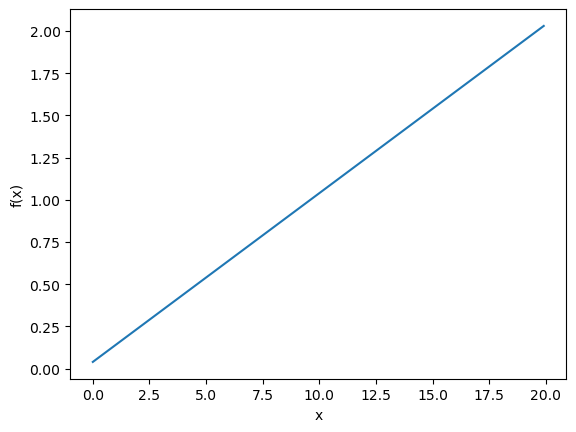

In [17]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함).
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5)

0.0999999999995449

In [19]:
numerical_diff(function_1, 10)

0.10000000000065512

### 4.3.3 편미분

In [20]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [22]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

* 여럿인 함수에 대한 미분을 편미분이라 합니다.

In [23]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [24]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

* 모든 변수의 편미분을 벡터로 정리한 것은 기울기라고 합니다.

In [25]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 값 복원

    return grad

In [26]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [27]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [28]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 4.4.1 경사법(경사 하강법)

* 손실 함수는 매우 복잡하고, 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없습니다.
* 이런 상황에서 기울기를 잘 이용하여 함수의 최솟값을 찾으려는 것이 최솟값입니다.

* 함수가 최솟값 안장점이 되는 장소에서는 기울기가 0입니다. 
* 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 
* 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복합니다. 
* 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법입니다. 

In [29]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr* grad
    return x

In [30]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [31]:
init_x = np.array([-3.0, 4.0])

In [32]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [33]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

#학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 4.4.2 신경망에서의 기울기

In [34]:
import sys, os
sys.path.append("C:\\Users\\user\\Downloads\\deeplearning_from_scratch-master\\deeplearning_from_scratch-master\\ch4.신경망 학습\\gradient_simplenet.py")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
        

In [35]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-0.71651328  0.17803515  1.02608146]
 [-1.27364049 -0.11504121 -1.15048077]]


In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.57618441  0.003284   -0.41978382]


In [37]:
np.argmax(p) # 최댓값의 인덱스

1

In [38]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

1.0442456497024368

In [39]:
def f(W):
    return net.loss(x, t)

In [40]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.06643895  0.32238672 -0.38882567]
 [ 0.09965842  0.48358009 -0.5832385 ]]


In [41]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

### 전제
* 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 합니다. 신경망 학습은 다음가 같이 4단계로 수행합니다. 

### 1단계 - 미니배치
* 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표입닏. 

### 2단계 - 기울기 산출
* 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다. 

### 3단계 - 매개변수 갱신
* 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다. 

### 4단계 - 반복
* 1~3단계를 반복합니다. 

### 4.5.1 2층 신경망 클래스 구현하기

In [42]:
import sys, os
sys.path.append("C:\\Users\\user\\Downloads\\deeplearning_from_scratch-master\\deeplearning_from_scratch-master\\ch4.신경망 학습\\two_layer_net.py")
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측을 한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # 손실 함수를 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [43]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape  

(784, 100)

In [44]:
net.params['b1'].shape

(100,)

In [45]:
net.params['W2'].shape

(100, 10)

In [46]:
net.params['b2'].shape

(10,)

In [47]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [49]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)  
grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

### 4.5.2 미니배치 학습 구현하기

In [53]:
import numpy as np
import sys, os
sys.path.append("C:\\Users\\user\\Downloads\\deeplearning_from_scratch-master\\deeplearning_from_scratch-master\\ch4.신경망 학습\\two_layer_net.py")
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 1000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

ModuleNotFoundError: No module named 'two_layer_net'

### 4.5.3 시험 데이터로 평가하기

In [52]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)

# 하이퍼 파라메터
iters_num = 1000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    print(i)
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
# 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | "
              + str(train_acc) + ", " + str(test_acc))

ModuleNotFoundError: No module named 'two_layer_net'

## 4.6. 정리

### 이번 장에서 배운 내용

* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용합니다.
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가합니다.
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신합니다.  
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복합니다. 
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 합니다. 
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있습니다. 
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단합니다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있습니다.